# A2C Agent 

In [56]:
import gym
from a2c import A2CAgent 
import time

# Create Gym environment
a2c_env = "CartPole-v1"
env = gym.make(a2c_env)

# Check agent class for initialization parameters and initialize agent
gamma = 0.90
lr = 1e-3

agent = A2CAgent(env, gamma, lr)

# Define training parameters
max_episodes = 700
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    trajectory = []
    state = env.reset()
    episode_reward = 0
    for step in range(max_steps):
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        trajectory.append((state, action, reward, next_state, done))
        episode_reward += reward  
        if done or step == max_steps:
            episode_rewards.append(episode_reward)
            print("Episode " + str(episode) + ": " + str(episode_reward))
            break
        state = next_state
    agent.update(trajectory, 0)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
a2c_rewards = episode_rewards
a2c_runtime = run_time

Episode 0: 28.0
Episode 1: 24.0
Episode 2: 12.0
Episode 3: 26.0
Episode 4: 17.0
Episode 5: 22.0
Episode 6: 11.0
Episode 7: 32.0
Episode 8: 27.0
Episode 9: 28.0
Episode 10: 66.0
Episode 11: 27.0
Episode 12: 15.0
Episode 13: 27.0
Episode 14: 55.0
Episode 15: 17.0
Episode 16: 26.0
Episode 17: 15.0
Episode 18: 31.0
Episode 19: 46.0
Episode 20: 40.0
Episode 21: 54.0
Episode 22: 66.0
Episode 23: 44.0
Episode 24: 49.0
Episode 25: 72.0
Episode 26: 38.0
Episode 27: 18.0
Episode 28: 61.0
Episode 29: 51.0
Episode 30: 26.0
Episode 31: 103.0
Episode 32: 44.0
Episode 33: 58.0
Episode 34: 35.0
Episode 35: 120.0
Episode 36: 40.0
Episode 37: 28.0
Episode 38: 46.0
Episode 39: 87.0
Episode 40: 29.0
Episode 41: 37.0
Episode 42: 104.0
Episode 43: 65.0
Episode 44: 51.0
Episode 45: 76.0
Episode 46: 105.0
Episode 47: 49.0
Episode 48: 48.0
Episode 49: 66.0
Episode 50: 30.0
Episode 51: 62.0
Episode 52: 76.0
Episode 53: 57.0
Episode 54: 80.0
Episode 55: 40.0
Episode 56: 51.0
Episode 57: 213.0
Episode 58: 64.0
Ep

Episode 448: 245.0
Episode 449: 214.0
Episode 450: 199.0
Episode 451: 203.0
Episode 452: 191.0
Episode 453: 185.0
Episode 454: 150.0
Episode 455: 175.0
Episode 456: 221.0
Episode 457: 186.0
Episode 458: 179.0
Episode 459: 189.0
Episode 460: 215.0
Episode 461: 170.0
Episode 462: 170.0
Episode 463: 156.0
Episode 464: 209.0
Episode 465: 230.0
Episode 466: 177.0
Episode 467: 162.0
Episode 468: 216.0
Episode 469: 206.0
Episode 470: 154.0
Episode 471: 255.0
Episode 472: 182.0
Episode 473: 163.0
Episode 474: 171.0
Episode 475: 167.0
Episode 476: 152.0
Episode 477: 159.0
Episode 478: 170.0
Episode 479: 162.0
Episode 480: 243.0
Episode 481: 164.0
Episode 482: 204.0
Episode 483: 189.0
Episode 484: 152.0
Episode 485: 154.0
Episode 486: 167.0
Episode 487: 215.0
Episode 488: 163.0
Episode 489: 138.0
Episode 490: 158.0
Episode 491: 213.0
Episode 492: 248.0
Episode 493: 193.0
Episode 494: 205.0
Episode 495: 225.0
Episode 496: 175.0
Episode 497: 180.0
Episode 498: 291.0
Episode 499: 214.0
Episode 500:

# DR TRPO Agent (KL) 

In [58]:
import gym
from a2c_dr_trpo import DRTRPOAgent 
import time

# Create Gym environment
kl_env = "CartPole-v1"
env = gym.make(kl_env)

# Check agent class for initialization parameters and initialize agent
gamma = 0.90
lr = 1e-2

agent = DRTRPOAgent(env, gamma, lr)

############################### MC Updates  (Full Episode) ###############################

# Define training parameters
max_episodes = 500
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    first_state = env.reset()
    state_adv = []
    total_value_loss = 0
    
    episode_reward = 0
    # loop through the first action
    for i in range(env.action_space.n):
        env.reset()
        state = first_state
        action = i
        trajectory = []
        
        for step in range(max_steps):
            if step != 0:
                action = agent.get_action(state)
            next_state, reward, done, _ = env.step(action)
            trajectory.append((state, action, reward, next_state, done))
            episode_reward += reward  
            if done or step == max_steps-1:
                break
            state = next_state
            
        adv, value_loss = agent.compute_adv_mc(trajectory)
        state_adv.append(adv[0])
        total_value_loss += value_loss
    
    beta = 1
    policy_loss = agent.compute_policy_loss_kl(state, state_adv, beta)
    agent.update(value_loss, policy_loss)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
    avg_episode_reward = episode_reward/env.action_space.n
    episode_rewards.append(avg_episode_reward)
    print("Episode " + str(episode) + ": " + str(avg_episode_reward))

dr_trpo_kl_rewards = episode_rewards
dr_trpo_kl_runtime = run_time

Episode 0: 16.0
Episode 1: 20.5
Episode 2: 42.0
Episode 3: 26.5
Episode 4: 42.5
Episode 5: 35.5
Episode 6: 27.5
Episode 7: 32.5
Episode 8: 41.0
Episode 9: 73.0
Episode 10: 93.5
Episode 11: 56.0
Episode 12: 65.5
Episode 13: 83.0
Episode 14: 108.0
Episode 15: 64.0
Episode 16: 97.5
Episode 17: 175.0
Episode 18: 113.5
Episode 19: 93.5
Episode 20: 196.0
Episode 21: 84.5
Episode 22: 54.0
Episode 23: 117.0
Episode 24: 98.5
Episode 25: 100.5
Episode 26: 143.5
Episode 27: 134.5
Episode 28: 106.0
Episode 29: 149.0
Episode 30: 159.0
Episode 31: 96.0
Episode 32: 63.0
Episode 33: 109.0
Episode 34: 120.5
Episode 35: 99.0
Episode 36: 82.5
Episode 37: 111.0
Episode 38: 83.0
Episode 39: 84.5
Episode 40: 163.5
Episode 41: 63.5
Episode 42: 128.5
Episode 43: 87.0
Episode 44: 82.0
Episode 45: 92.5
Episode 46: 132.5
Episode 47: 112.5
Episode 48: 104.0
Episode 49: 70.0
Episode 50: 102.0
Episode 51: 94.5
Episode 52: 77.5
Episode 53: 87.0
Episode 54: 119.0
Episode 55: 87.0
Episode 56: 141.0
Episode 57: 120.0
E

Episode 442: 234.0
Episode 443: 270.0
Episode 444: 111.5
Episode 445: 308.0
Episode 446: 268.0
Episode 447: 311.0
Episode 448: 301.5
Episode 449: 175.0
Episode 450: 108.5
Episode 451: 194.0
Episode 452: 198.0
Episode 453: 228.0
Episode 454: 223.0
Episode 455: 241.5
Episode 456: 220.5
Episode 457: 243.5
Episode 458: 253.0
Episode 459: 233.5
Episode 460: 324.0
Episode 461: 183.5
Episode 462: 189.5
Episode 463: 214.5
Episode 464: 244.0
Episode 465: 204.0
Episode 466: 261.5
Episode 467: 321.0
Episode 468: 207.0
Episode 469: 185.0
Episode 470: 171.5
Episode 471: 223.0
Episode 472: 250.5
Episode 473: 232.0
Episode 474: 289.0
Episode 475: 240.5
Episode 476: 260.0
Episode 477: 222.5
Episode 478: 168.0
Episode 479: 255.0
Episode 480: 298.5
Episode 481: 266.5
Episode 482: 279.5
Episode 483: 289.0
Episode 484: 215.0
Episode 485: 222.0
Episode 486: 246.5
Episode 487: 300.0
Episode 488: 244.0
Episode 489: 193.0
Episode 490: 213.5
Episode 491: 230.5
Episode 492: 270.5
Episode 493: 177.5
Episode 494:

# DR TRPO Agent (Wasserstein)

In [52]:
import gym
from a2c_dr_trpo import DRTRPOAgent 
import time
import numpy as np

wass_env = "CartPole-v1"
# Create Gym environment
env = gym.make(wass_env)

# Check agent class for initialization parameters and initialize agent
gamma = 0.9
lr = 1e-2

agent = DRTRPOAgent(env, gamma, lr)

############################### MC Updates  (Full Episode) ###############################

# Define training parameters
max_episodes = 700
max_steps = 500
total_adv_diff = 0

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    first_state = env.reset()
    state_adv = []
    total_value_loss = 0
    
    episode_reward = 0
    # loop through the first action
    for i in range(env.action_space.n):
        env.reset()
        state = first_state
        action = i
        trajectory = []
        
        for step in range(max_steps):
            if step != 0:
                action = agent.get_action(state)
            next_state, reward, done, _ = env.step(action)
            trajectory.append((state, action, reward, next_state, done))
            episode_reward += reward  
            if done or step == max_steps-1:
                break
            state = next_state
            
        adv, value_loss = agent.compute_adv_mc(trajectory)
        state_adv.append(adv[0])
        total_value_loss += value_loss
    
    total_adv_diff += abs(state_adv[1] - state_adv[0])
    beta = total_adv_diff/episode
    policy_loss = agent.compute_policy_loss_wass(state, state_adv, beta)

    
    agent.update(value_loss, policy_loss)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
    avg_episode_reward = episode_reward/env.action_space.n
    episode_rewards.append(avg_episode_reward)
    print("Episode " + str(episode) + ": " + str(avg_episode_reward))

dr_trpo_wass_rewards = episode_rewards
dr_trpo_wass_runtime = run_time

Episode 0: 19.0
Episode 1: 31.5
Episode 2: 14.5
Episode 3: 15.0
Episode 4: 23.5
Episode 5: 30.5
Episode 6: 29.0
Episode 7: 20.5
Episode 8: 34.0
Episode 9: 26.0
Episode 10: 66.5
Episode 11: 32.5
Episode 12: 63.5
Episode 13: 43.5
Episode 14: 91.0
Episode 15: 55.0
Episode 16: 63.0
Episode 17: 99.0
Episode 18: 52.5
Episode 19: 52.5
Episode 20: 71.0
Episode 21: 34.5
Episode 22: 50.0
Episode 23: 39.0
Episode 24: 46.0
Episode 25: 53.0
Episode 26: 71.0
Episode 27: 36.5
Episode 28: 29.5
Episode 29: 44.5
Episode 30: 43.5
Episode 31: 34.5
Episode 32: 34.0
Episode 33: 42.0
Episode 34: 31.0
Episode 35: 32.5
Episode 36: 32.0
Episode 37: 34.0
Episode 38: 49.0
Episode 39: 35.5
Episode 40: 27.0
Episode 41: 32.5
Episode 42: 38.0
Episode 43: 57.0
Episode 44: 42.0
Episode 45: 101.0
Episode 46: 65.0
Episode 47: 41.0
Episode 48: 109.5
Episode 49: 53.0
Episode 50: 78.0
Episode 51: 95.5
Episode 52: 58.0
Episode 53: 60.5
Episode 54: 180.0
Episode 55: 126.5
Episode 56: 54.5
Episode 57: 133.0
Episode 58: 174.0
E

Episode 450: 431.5
Episode 451: 203.5
Episode 452: 355.0
Episode 453: 320.0
Episode 454: 299.0
Episode 455: 213.0
Episode 456: 418.5
Episode 457: 318.5
Episode 458: 356.5
Episode 459: 387.0
Episode 460: 132.5
Episode 461: 472.5
Episode 462: 353.5
Episode 463: 119.5
Episode 464: 363.0
Episode 465: 369.0
Episode 466: 374.0
Episode 467: 240.5
Episode 468: 307.5
Episode 469: 423.0
Episode 470: 284.5
Episode 471: 346.0
Episode 472: 327.5
Episode 473: 371.5
Episode 474: 367.0
Episode 475: 296.0
Episode 476: 246.0
Episode 477: 375.0
Episode 478: 390.0
Episode 479: 163.5
Episode 480: 298.0
Episode 481: 419.5
Episode 482: 351.0
Episode 483: 321.0
Episode 484: 331.0
Episode 485: 236.0
Episode 486: 315.0
Episode 487: 219.5
Episode 488: 309.0
Episode 489: 360.0
Episode 490: 258.0
Episode 491: 370.0
Episode 492: 382.5
Episode 493: 358.0
Episode 494: 331.0
Episode 495: 433.0
Episode 496: 347.5
Episode 497: 265.0
Episode 498: 259.0
Episode 499: 362.0
Episode 500: 257.0
Episode 501: 303.0
Episode 502:

# Graph

In [3]:
import matplotlib.pyplot as plt
import time
import numpy as np

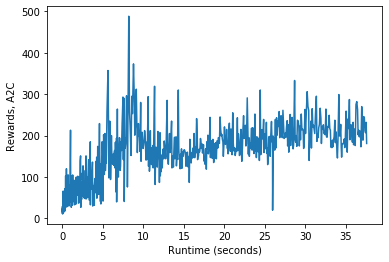

In [57]:
plt.plot(a2c_runtime, a2c_rewards)
plt.ylabel('Rewards, A2C')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/a2c/' + a2c_env + '-' + str(time.time()) + '.csv' 
out = np.column_stack((a2c_runtime, a2c_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')

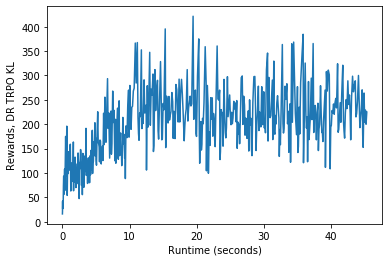

In [59]:
plt.plot(dr_trpo_kl_runtime, dr_trpo_kl_rewards)
plt.ylabel('Rewards, DR TRPO KL')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/dr_trpo_kl/' + kl_env + '-' + str(time.time()) + '.csv' 
out = np.column_stack((dr_trpo_kl_runtime, dr_trpo_kl_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')

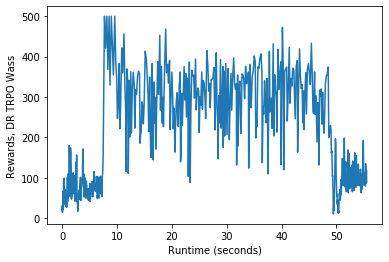

In [53]:
plt.plot(dr_trpo_wass_runtime, dr_trpo_wass_rewards)
plt.ylabel('Rewards, DR TRPO Wass')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/dr_trpo_wass/' + wass_env + '-' + str(time.time()) + '.csv' 
out = np.column_stack((dr_trpo_wass_runtime, dr_trpo_wass_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')